In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing the dataset

dataset = pd.read_csv('/content/clean_dataset (1).csv')

# Summarize Dataset

print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

# Segregating & Zipping Dataset
Debt = dataset['Debt'].values
YearsEmployed = dataset['YearsEmployed'].values
CreditScore = dataset['CreditScore'].values
ZipCode = dataset['ZipCode'].values
X = np.array(list(zip(Debt,YearsEmployed,CreditScore,ZipCode)))

(690, 16)
           Gender         Age        Debt     Married  BankCustomer  \
count  690.000000  690.000000  690.000000  690.000000    690.000000   
mean     0.695652   31.514116    4.758725    0.760870      0.763768   
std      0.460464   11.860245    4.978163    0.426862      0.425074   
min      0.000000   13.750000    0.000000    0.000000      0.000000   
25%      0.000000   22.670000    1.000000    1.000000      1.000000   
50%      1.000000   28.460000    2.750000    1.000000      1.000000   
75%      1.000000   37.707500    7.207500    1.000000      1.000000   
max      1.000000   80.250000   28.000000    1.000000      1.000000   

        Ethnicity  YearsEmployed  PriorDefault    Employed  CreditScore  \
count  690.000000     690.000000    690.000000  690.000000    690.00000   
mean     0.781159       2.223406      0.523188    0.427536      2.40000   
std      1.151736       3.346513      0.499824    0.495080      4.86294   
min      0.000000       0.000000      0.000000    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

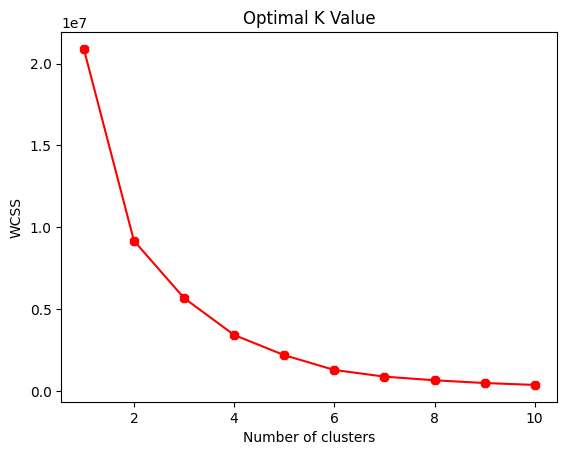

In [2]:
# Finding the Optimized K Value
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [3]:
# Fitting the k-means to the dataset with k=4

model=KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


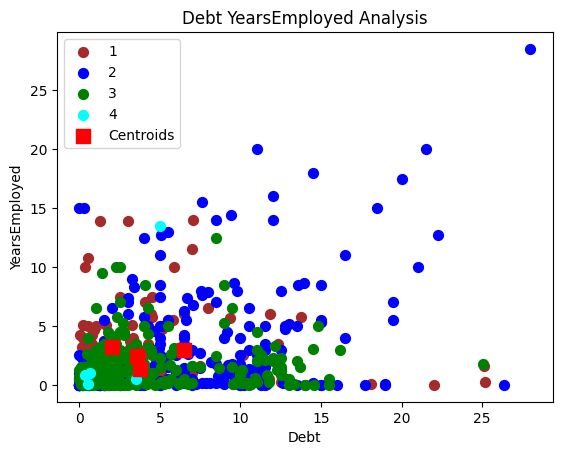

In [4]:
"""### Visualizing the clusters for k=4

Cluster 1: Customers with medium debt and low yearsEmployed

Cluster 2: Customers with high debt and medium to high yearsEmployed

Cluster 3: Customers with low debt

Cluster 4: Customers with medium debt but high yearsEmployed
"""

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='red', label='Centroids')
plt.title('Debt YearsEmployed Analysis')
plt.xlabel('Debt')
plt.ylabel('YearsEmployed')
plt.legend()
plt.show()

In [5]:
#Computing K-Means for k=4 and fitting the clusters into the dataset
dataset.drop(dataset.iloc[:,15:53],axis = 1,inplace = True)
from sklearn.cluster import KMeans
clusters = KMeans(4)
dataset=dataset.drop(['Industry'], axis= 1)
clusters.fit(dataset)
dataset["clusterid"] = clusters.labels_
dataset[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Debt,Married,BankCustomer,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,clusterid
0,1,30.83,0.000,1,1,0,1.25,1,1,1,0,1,202,0,1
1,0,58.67,4.460,1,1,1,3.04,1,1,6,0,1,43,560,1
2,0,24.50,0.500,1,1,1,1.50,1,0,0,0,1,280,824,1
3,1,27.83,1.540,1,1,0,3.75,1,1,5,1,1,100,3,1
4,1,20.17,5.625,1,1,0,1.71,1,0,0,0,0,120,0,1


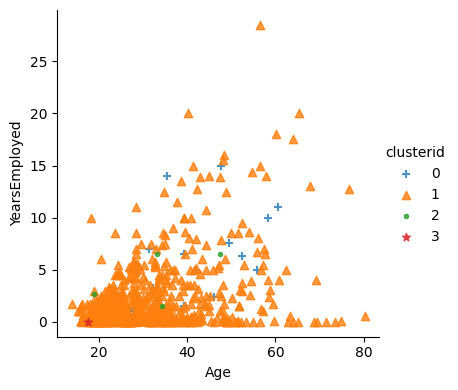

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

markers = ['+', '^', '.', '*']
sns.lmplot(x='Age', y='YearsEmployed', data=dataset, hue='clusterid', fit_reg=False, markers=markers, height=4)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


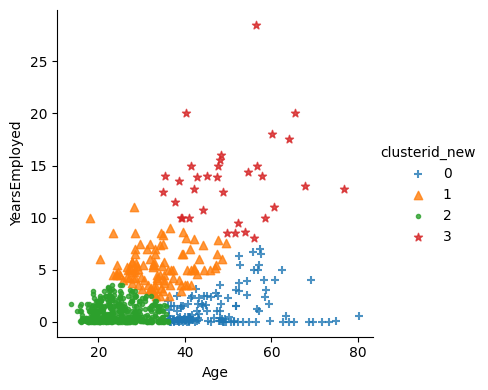

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the 'Age' and 'YearsEmployed' columns using StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset[['Age', 'YearsEmployed']])

# Fit K-means clustering to the scaled data
clusters_new = KMeans(n_clusters=4, random_state=42)
clusters_new.fit(scaled_dataset)

# Add cluster labels to the dataset
dataset["clusterid_new"] = clusters_new.labels_

# Define markers for the clusters
markers = ['+', '^', '.', '*']

# Create a scatter plot to visualize the clusters
sns.lmplot(x='Age', y='YearsEmployed', data=dataset, hue='clusterid_new', fit_reg=False, markers=markers, height=4)

# Show the plot
plt.show()


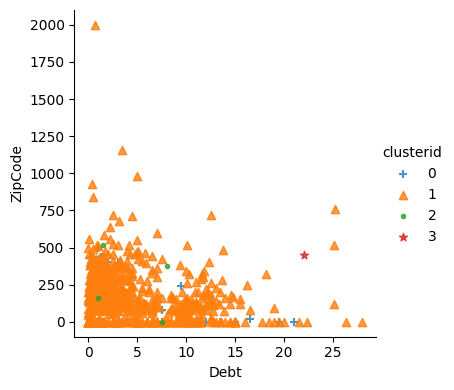

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define markers for the clusters
markers = ['+', '^', '.', '*']

# Create a scatter plot to visualize the clusters
sns.lmplot(x='Debt', y='ZipCode', data=dataset, hue='clusterid', fit_reg=False, markers=markers, height=4)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


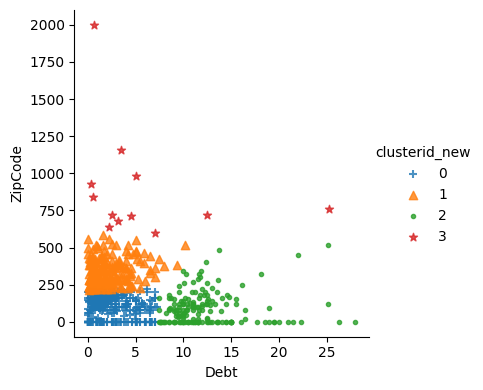

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the 'Age' and 'YearsEmployed' columns using StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset[['Debt', 'ZipCode']])

# Fit K-means clustering to the scaled data
clusters_new = KMeans(n_clusters=4, random_state=42)
clusters_new.fit(scaled_dataset)

# Add cluster labels to the dataset
dataset["clusterid_new"] = clusters_new.labels_

# Define markers for the clusters
markers = ['+', '^', '.', '*']

# Create a scatter plot to visualize the clusters
sns.lmplot(x='Debt', y='ZipCode', data=dataset, hue='clusterid_new', fit_reg=False, markers=markers, height=4)

# Show the plot
plt.show()
